In [45]:
import numpy as np 
import pandas as pd

from K_means import Kmeans
from sklearn.cluster import KMeans 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from scipy.spatial.distance import cdist

import string

from nltk.corpus import stopwords

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import neattext.functions as nfx

from textblob import TextBlob as tb
from textblob import Word

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore')

In [46]:
july=pd.read_csv('05_PREPROCESSED_JULY.csv')

In [47]:
custom_words = ['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come', '%', '.', 'the', 'etc', 'pls', 'btw', 'let', 'hgd', 'get', 'amp', 'gt','lt','hrs','dos','say','reply','sir','replying','update','sri']

In [48]:
for i in range(0,july.shape[0]):
    july['clean_tweet'][i]= ''.join([i for i in july['clean_tweet'][i] if not i.isdigit()])
    july['clean_tweet'][i]=july['clean_tweet'][i].lower()
    july['clean_tweet'][i]=nfx.remove_custom_words(july['clean_tweet'][i],custom_words)

In [49]:
tweets_july=july['clean_tweet']

In [50]:
tweet_list_july = tweets_july.apply(nfx.remove_stopwords)
tweet_list_july = tweet_list_july .apply(nfx.remove_special_characters)
tweet_list_july = tweet_list_july.apply(nfx.remove_punctuations)

In [51]:
def remove_single_char(list):
    for token in list:
        if( len(token)==1):
            list.remove(token)
def remove_dual_char(list):
    for token in list:
        if( len(token)==2):
            list.remove(token)
def remove_words(list1, remove_words):
    for word in list(list1):
        if word in remove_words:
            list1.remove(word)
    return list1   

In [52]:
def Convert_list(string):
    li = list(string.split(" "))
    return li
def listToString(s): 
    str1 = " " 
    return (str1.join(s))

In [53]:
for i in range(0,july.shape[0]):
    ls=Convert_list(tweet_list_july[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_july[i]=listToString(ls)

In [54]:
def my_lemma(token,i=0):
    word=tb(token)
    tags=word.tags
    sample=Word(tags[0][0])
    if tags[0][1][0] =='V':
        x=sample.lemmatize('v')
        ls[i]=x
    else:
        x=sample.lemmatize()
        ls[i]=x

In [55]:
for i in range(0,july.shape[0]):
    ls=Convert_list(tweet_list_july[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
                continue
        word=tb(text)
        tags=word.tags
        sample=Word(tags[0][0])
        if tags[0][1][0] =='V':
                x=sample.lemmatize('v')
                ls[j]=x
        else:
                x=sample.lemmatize()
                ls[j]=x

In [56]:
for i in range(0,july.shape[0]):
    ls=Convert_list(tweet_list_july[i])
    for j in range(0,len(ls)):
        text=ls[j]
        if(text==""):
            continue
        my_lemma(text,j)
    tweet_list_july[i]=listToString(ls)

In [57]:
for i in range(0,july.shape[0]):
    ls=Convert_list(tweet_list_july[i])
    ls=remove_words(ls,custom_words)
    tweet_list_july[i]=listToString(ls)

In [58]:
july['clean_tweet']=tweet_list_july

In [59]:
july['clean_tweet']

0                                     covid admission far
1                  uggah sarawak free covid delta variant
2                                  follow covid guideline
3       parent senior citizen vaccinate way port blair...
4       fastspreading delta variant vaccination rate r...
                              ...                        
1988    double vaccine protect variant report afp news...
1989          covid vaccine havent vaccine love one world
1990                  salute real worrier covid   kolkata
1991    passenger fully vaccinate pcr formality best i...
1992    warm wish doctor day doctor work hard restore ...
Name: clean_tweet, Length: 1993, dtype: object

In [60]:
tweet_list_july=july['clean_tweet']

In [61]:
ps=PorterStemmer()

In [62]:
for i in range(0,july.shape[0]):
    ls=july['clean_tweet'][i]
    words = word_tokenize(ls)
    st=""
    for w in words:
        w=ps.stem(w)
        st+=w+' '
    july['clean_tweet'][i]=st

In [63]:
for i in range(0,july.shape[0]):
    ls=Convert_list(tweet_list_july[i])
    remove_single_char(ls)
    remove_dual_char(ls)
    ls=remove_words(ls,custom_words)
    tweet_list_july[i]=listToString(ls)

In [64]:
july['clean_tweet']=tweet_list_july

# K-Means

In [65]:
data =july['clean_tweet']

tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [66]:
pd.DataFrame(tf_idf_array, columns=tf_idf_vectorizor.get_feature_names())

,aadhar,aai,aananda,aankh,aao,aap,aayurved,abbott,abcd,abduct,...,yup,yvett,zafar,zampmilk,zbhkk,zealand,zee,zero,zika,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


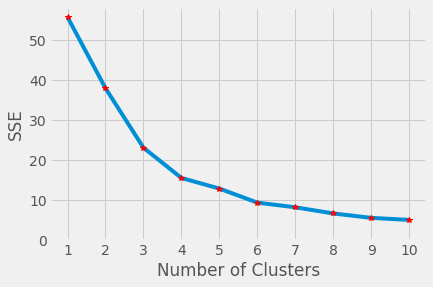

In [67]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans_kwargs = {"init": "k-means++","n_init": 2,"max_iter": 1000,"random_state": 42,}
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(Y_sklearn)
    sse.append(kmeans.inertia_)
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.plot(range(1, 11), sse,'r*')
plt.xticks(range(1, 11))
plt.yticks(range(0,60,10))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.7457518423539595
For n_clusters = 3 The average silhouette_score is : 0.6575683027605923
For n_clusters = 4 The average silhouette_score is : 0.5326177732207111
For n_clusters = 5 The average silhouette_score is : 0.4242249062606434
For n_clusters = 6 The average silhouette_score is : 0.5294750306521612
For n_clusters = 7 The average silhouette_score is : 0.46701011846427726
For n_clusters = 8 The average silhouette_score is : 0.4989543988096248
For n_clusters = 9 The average silhouette_score is : 0.5183257940454857
For n_clusters = 10 The average silhouette_score is : 0.5103596136063946


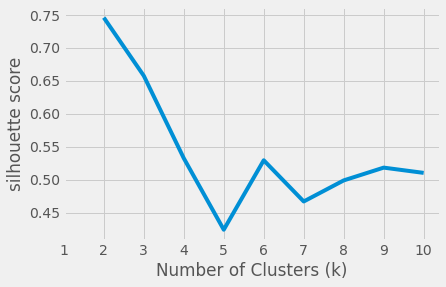

In [68]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.style as style
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, **kmeans_kwargs)
    cluster_labels = clusterer.fit_predict(Y_sklearn)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(Y_sklearn, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(Y_sklearn, cluster_labels)
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.xticks(range(1, 11))
plt.show()

Text(0.5, 1.0, 'July')

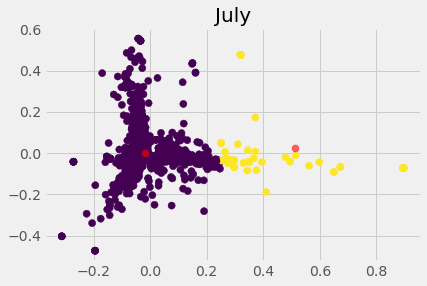

In [69]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=2, max_iter=1000,n_init=2, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

centers = fitted.cluster_centers_
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], c=prediction, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1],c='red', s=50, alpha=0.6);
# plt.xlabel("Feature space for the 1st feature")
# plt.ylabel("Feature space for the 2nd feature")
plt.title("July",fontsize=20)

In [70]:
labels = np.unique(prediction)
dfs1 = []
for label in labels:
    id_temp = np.where(prediction==label) 
    x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
    sorted_means = np.argsort(x_means)[::-1]
    features = tf_idf_vectorizor.get_feature_names()
    best_features = [(features[i], x_means[i]) for i in sorted_means]
    df = pd.DataFrame(best_features, columns = ['features', 'score'])
    dfs1.append(df)

In [71]:
dfs1[0]

,features,score
0,covid,0.051482
1,vaccin,0.039568
2,corona,0.026181
3,case,0.022454
4,coronaviru,0.021175
...,...,...
5325,districtkushtia,0.000000
5326,kushtia,0.000000
5327,clue,0.000000
5328,neighbor,0.000000


In [72]:
dfs1[1]

,features,score
0,viru,0.411837
1,corona,0.370553
2,awar,0.070205
3,bulletin,0.057981
4,recov,0.055163
...,...,...
5325,period,0.000000
5326,perman,0.000000
5327,permen,0.000000
5328,permiss,0.000000


In [73]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array,prediction, 10)

In [74]:
april_cluster=dfs

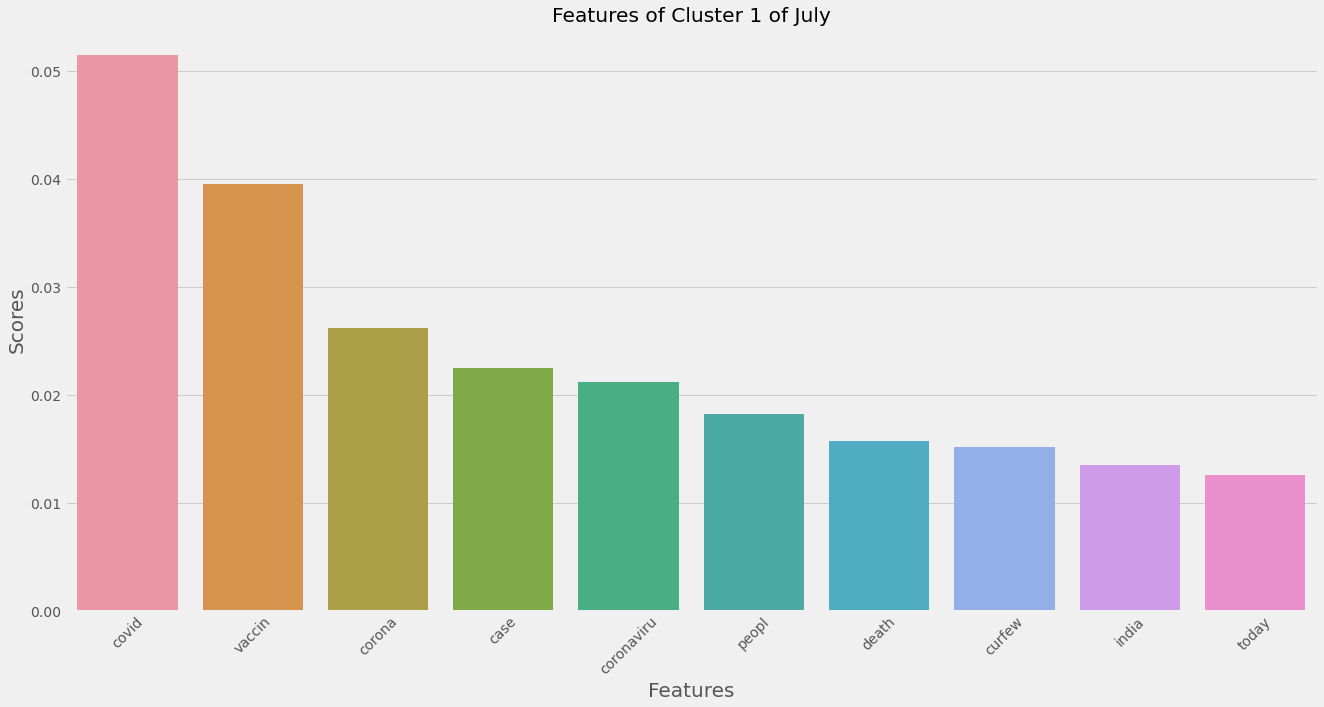

In [91]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=april_cluster[0]).set(title="Features of Cluster 1 of July")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

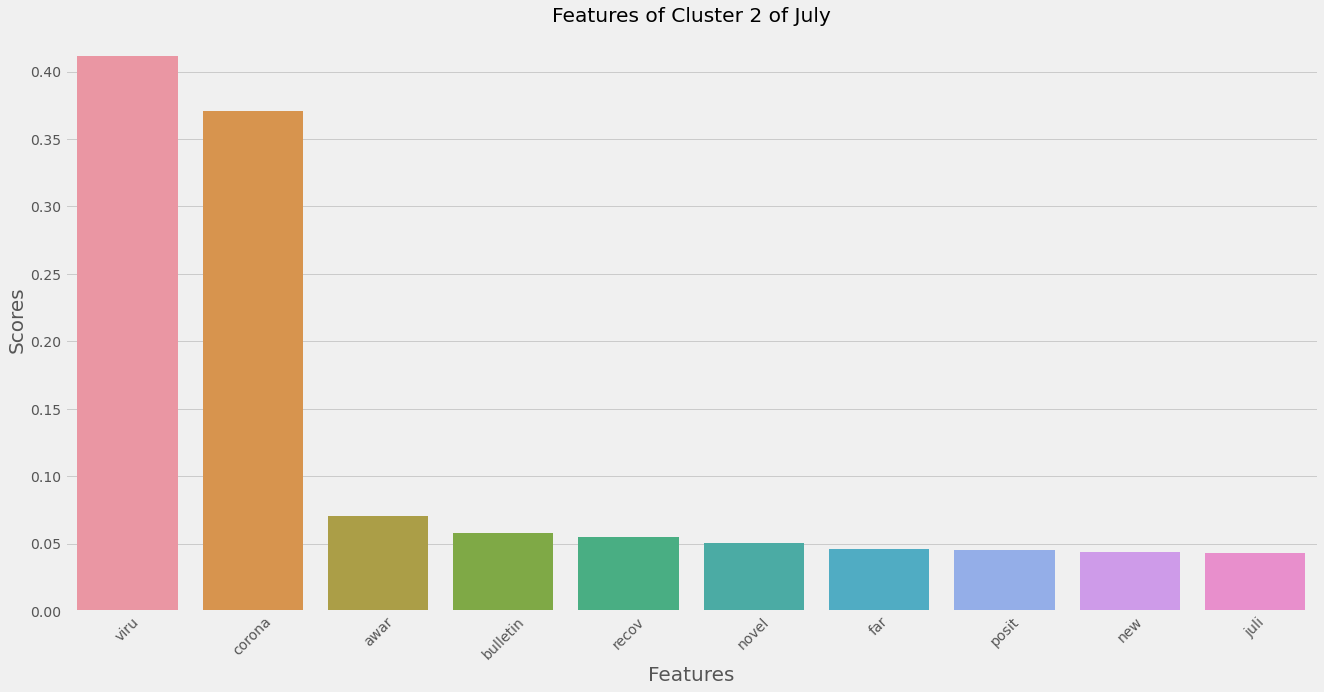

In [92]:

# Figure Size
fig = plt.figure(figsize =(20, 10))
 
# Horizontal Bar Plot
sns.barplot(x='features',y='score',data=april_cluster[1]).set(title="Features of Cluster 2 of July")
plt.xlabel('Features',fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.xticks(rotation=45)
# Show Plot
plt.show()

In [77]:

K1=dfs1[0]
K2=dfs1[1]

In [78]:
july_bw=pd.read_csv('JulyTopWords.csv')

In [79]:
t=july_bw[:30]

In [80]:
c1=[]
p=0
c2=[]
q=0
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K1['features'][j]):
            c1.append(K1['features'][j])
            p=p+1
for i in range(0,30):
    for j in range(0,100):
        if(t.words[i]==K2['features'][j]):
            c2.append(K1['features'][j])
            q=q+1

In [81]:
print(p)
print(q)


29
16


### Tweet Grouping

In [82]:
label=kmeans.labels_
july['label']=label
july.head(3)

,tweet,clean_tweet,hastags,attherate,urls,emojis,label
0,@anileshmahajan @tsrawatbjp @TIRATHSRAWAT @BJP...,covid admiss far,[],"['@anileshmahajan', '@tsrawatbjp', '@TIRATHSRA...",[],[],0
1,Uggah: Sarawak still free of Covid-19 Delta va...,uggah sarawak free covid delta variant,[],[],['https://t.co/BtjONCXGgI'],[],0
2,@RomainSandro Following Covid 19 guidelines.,follow covid guidelin,[],['@RomainSandro'],[],[],0


In [83]:
np.unique(july['label'])

array([0, 1])

In [84]:
july['label'].value_counts()

0    1928
1      65
Name: label, dtype: int64

In [85]:
july_cluster_1=july[july.label ==0]
july_cluster_2=july[july.label ==1]

In [86]:
july_cluster_1.to_csv('JulyCluster1Tweet.csv')
july_cluster_2.to_csv('JulyCluster2Tweet.csv')

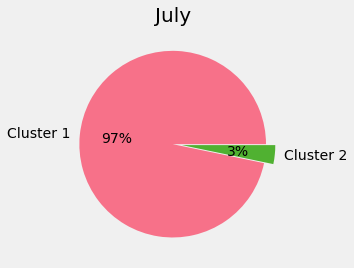

In [90]:
count=july['label'].value_counts()
tweet_freq_cluster=[]
tweet_freq_cluster.append(count[0])
tweet_freq_cluster.append(count[1])
cluster_name=['Cluster 1','Cluster 2']
explode = [0, 0.1]
palette_color = sns.color_palette("husl", 3)
  
# plotting data on chart
plt.pie(tweet_freq_cluster, labels=cluster_name, colors=palette_color,   explode=explode,autopct='%.0f%%')
plt.title("July",fontsize=20)
# displaying chart
plt.show()

In [88]:
july['tweet'][1229]

'Someone will tell that if i make a program then it will contain corona virus or anything else 😂😂🤣 #programmer #virus @PR0GRAMMERHUM0R  @Hakertow'